In [1]:
!pip install imbalanced-learn
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head() #display top5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()# last 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
data.shape

(10000, 14)

In [5]:
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 10000
Number of columns 14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()#no null values in data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
import pandas as pd
data = pd.get_dummies(data)
data = data.astype(int)

In [14]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


In [15]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

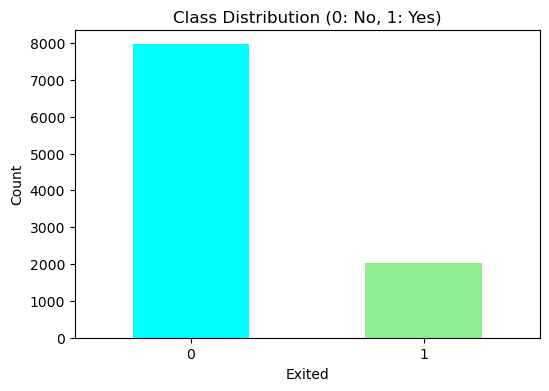

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

plt.figure(figsize=(6, 4))
data['Exited'].value_counts().plot(kind='bar', color=['aqua', 'lightgreen'])
plt.title('Class Distribution (0: No, 1: Yes)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [17]:
#we can see we have imbalanced dataset

In [18]:
x=data.drop('Exited',axis=1) #independet feature
y=data['Exited']#dependent feature

In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32

# handling the imbalance data

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [22]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# spliting the dataset

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


# feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [27]:
x_train

array([[-0.08395715,  1.01755034,  1.17353502, ..., -0.46150489,
        -0.81196445, -0.85153889],
       [ 1.0974171 ,  0.11156865, -1.39988519, ..., -0.46150489,
        -0.81196445,  1.17434448],
       [-0.28085286, -0.29108988,  1.17353502, ..., -0.46150489,
         1.23158101, -0.85153889],
       ...,
       [ 0.20044776,  0.21223328,  1.17353502, ..., -0.46150489,
        -0.81196445,  1.17434448],
       [-0.06207985,  1.01755034,  0.80590356, ..., -0.46150489,
         1.23158101, -0.85153889],
       [ 0.52860728,  1.01755034, -1.39988519, ..., -0.46150489,
        -0.81196445,  1.17434448]])

In [28]:
x_test

array([[-1.21940497, -1.18279048,  0.03308516, ..., -0.45175395,
         1.18054604, -0.8367238 ],
       [-0.45279364,  0.00841245, -0.33165295, ..., -0.45175395,
         1.18054604, -0.8367238 ],
       [ 0.34620971, -0.98425666,  1.4920376 , ...,  2.21359436,
         1.18054604, -0.8367238 ],
       ...,
       [ 0.10866817, -0.28938828,  0.39782327, ..., -0.45175395,
         1.18054604, -0.8367238 ],
       [ 1.10202369,  1.10034847,  0.39782327, ..., -0.45175395,
         1.18054604, -0.8367238 ],
       [ 0.68092733, -0.58718901, -0.69639106, ..., -0.45175395,
        -0.84706565,  1.19513751]])

# logisticregression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=lr.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.8414940364092907

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [36]:
precision_score(y_test,y_pred)

0.8643949930458971

In [37]:
recall_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8003863490019317, 0.8311601471079907)

# knn

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
y_preds=lr.predict(x_test)

In [49]:
accuracy_score(y_test,y_preds)

0.8414940364092907

In [52]:
precision_score(y_test,y_preds),recall_score(y_test,y_preds),f1_score(y_test,y_preds)

(0.8643949930458971, 0.8003863490019317, 0.8311601471079907)

# svc

In [38]:
from sklearn import svm

In [39]:
svm=svm.SVC()

In [40]:
svm.fit(x_train,y_train)

SVC()

In [41]:
y_pred2=svm.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.8860640301318268

In [44]:
precision_score(y_test,y_pred2)

0.9172510518934082

# random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf=RandomForestClassifier()

In [56]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_predsr=rf.predict(x_test)

In [71]:
accuracy_score(y_test,y_predsr)

0.8983050847457628

In [61]:
precision_score(y_test,y_predsr)

0.9104876419505677

#  GradientBoosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc=GradientBoostingClassifier()

In [64]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [65]:
y_predsg=rf.predict(x_test)

In [66]:
accuracy_score(y_test,y_predsg)

0.8983050847457628

In [67]:
precision_score(y_test,y_predsg),recall_score(y_test,y_predsg),f1_score(y_test,y_predsg)

(0.9104876419505677, 0.8776561493882807, 0.8937704918032787)

In [69]:
final_data=pd.DataFrame ({ 'Models': ['LR', 'Knn', 'svc', 'RF', 'GBC'],
'ACC': [accuracy_score (y_test, y_pred),
accuracy_score (y_test, y_preds),
accuracy_score (y_test, y_pred2),
accuracy_score (y_test, y_predsr),
accuracy_score (y_test, y_predsg)]})

In [70]:
final_data # rf and gbc give more accuarte ans

,Models,ACC
0,LR,0.841494
1,Knn,0.841494
2,svc,0.886064
3,RF,0.898305
4,GBC,0.898305
